In [1]:
# Data Analyis on Customers defaulted on loans

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from pandas_profiling import ProfileReport

In [3]:
##import/integrate data set in a varaible

In [4]:
credit = pd.read_csv('default of credit card clients.csv', header=1)

In [5]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
credit.describe()

ID       LIMIT_BAL      MARRIAGE           AGE         PAY_0  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.551867     35.485500     -0.016700   
std     8660.398374   129747.661567      0.521970      9.217904      1.123802   
min        1.000000    10000.000000      0.000000     21.000000     -2.000000   
25%     7500.750000    50000.000000      1.000000     28.000000     -1.000000   
50%    15000.500000   140000.000000      2.000000     34.000000      0.000000   
75%    22500.250000   240000.000000      2.000000     41.000000      0.000000   
max    30000.000000  1000000.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100   
std        1.197186      1.196868      1.169139      1.133187      1.149988   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 22 columns]

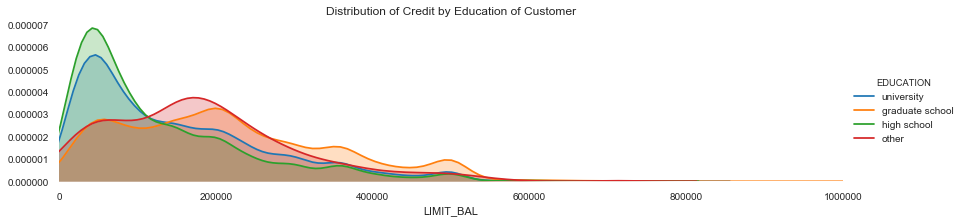

In [7]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect =4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
top = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Credit by Education of Customer')
fig.add_legend()

In [8]:
credit.rename(columns = {'default payment next month':'target'}, inplace = True)

In [9]:
#DataFrame has 30,000 rows, & 25 columns)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
target       30000 non-null object
dtypes: int64(22), object(3)
memory us

In [10]:
#DataFrame is two Dimentional
credit.ndim

2

In [11]:
#One-Hot Encoding Pandas* Approach 1
credit1 = pd.get_dummies(credit)

In [12]:
#Checking the DataTypes 
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
ID                           30000 non-null int64
LIMIT_BAL                    30000 non-null int64
MARRIAGE                     30000 non-null int64
AGE                          30000 non-null int64
PAY_0                        30000 non-null int64
PAY_2                        30000 non-null int64
PAY_3                        30000 non-null int64
PAY_4                        30000 non-null int64
PAY_5                        30000 non-null int64
PAY_6                        30000 non-null int64
BILL_AMT1                    30000 non-null int64
BILL_AMT2                    30000 non-null int64
BILL_AMT3                    30000 non-null int64
BILL_AMT4                    30000 non-null int64
BILL_AMT5                    30000 non-null int64
BILL_AMT6                    30000 non-null int64
PAY_AMT1                     30000 non-null int64
PAY_AMT2                     30000 non-nu

# Data Clean-up, Remove the outliers

In [13]:
#I found there are outlier for AGE > 60, so limit the column AGE to 60 years old.
credit1 = credit1.loc[(credit1['AGE'] <= 60)]

In [14]:
#I found there are outlier, limitng the columns values for Marriage & Credit Limit.
credit1 = credit1.loc[(credit1['MARRIAGE'] >= 1) & (credit1['MARRIAGE'] <= 2)]

In [15]:
credit1 = credit1.loc[(credit1['LIMIT_BAL'] >= 20000) & (credit1['LIMIT_BAL'] <= 300000)]

In [16]:
#I found there are outlier, limitng the columns values for Payment to <2.
#credit1 = credit1.loc[(credit1['PAY_0'] <= 2) & (credit1['PAY_2'] <= 2) & (credit1['PAY_3'] <= 2) & (credit1['PAY_4'] <= 2) & (credit1['PAY_5'] <= 2) & (credit1['PAY_6'] <= 2)]
credit1 = credit1.loc[(credit1['PAY_5'] <= 2) & (credit1['PAY_6'] <= 2)]

In [17]:
header = credit1.dtypes.index

In [18]:
columns_drop = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5']
credit1 = credit1.drop(columns_drop, axis=1)

In [19]:
columns_drop = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4']
credit1 = credit1.drop(columns_drop, axis=1)

In [20]:
columns_drop = ['PAY_5']
credit1 = credit1.drop(columns_drop, axis=1)

In [21]:
credit1 = credit1.drop(['ID'], axis=1)

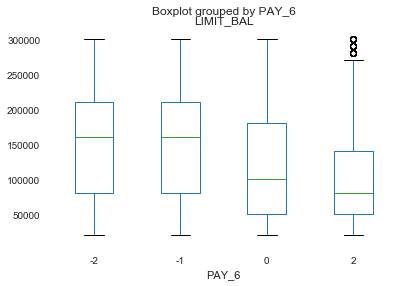

In [22]:
#Checking the Outlier using BOX Plot for Payment vs Credit Limit
#credit1.boxplot(by ='BILL_AMT6', column =['LIMIT_BAL'], grid = False)
credit1.boxplot(by ='PAY_6', column =['LIMIT_BAL'], grid = False)

In [23]:
credit1.profile_report()

In [24]:
corrMat = credit1.corr()
print(corrMat)

                           LIMIT_BAL  MARRIAGE       AGE     PAY_6  BILL_AMT6  \
LIMIT_BAL                   1.000000 -0.079267  0.107545 -0.217896   0.259041   
MARRIAGE                   -0.079267  1.000000 -0.463760  0.020558  -0.013073   
AGE                         0.107545 -0.463760  1.000000 -0.041479   0.023589   
PAY_6                      -0.217896  0.020558 -0.041479  1.000000   0.370161   
BILL_AMT6                   0.259041 -0.013073  0.023589  0.370161   1.000000   
PAY_AMT1                    0.146094  0.001523  0.010052  0.018742   0.178182   
PAY_AMT2                    0.137586 -0.002247  0.011346  0.008845   0.159037   
PAY_AMT3                    0.161035  0.013448  0.000346  0.030471   0.198087   
PAY_AMT4                    0.149671 -0.003607  0.007452  0.042089   0.225768   
PAY_AMT5                    0.154639  0.001838  0.007268 -0.034230   0.270381   
PAY_AMT6                    0.157450 -0.001447  0.005511 -0.002204   0.079171   
SEX_female                  

In [25]:
#Credit Limit Group by Payment5
credit1.groupby(['PAY_6', 'LIMIT_BAL'])['PAY_6'].count()

PAY_6  LIMIT_BAL
-2     20000        231
       30000        162
       40000         23
       50000        329
       60000         31
                   ... 
 2     260000        23
       270000         8
       280000        16
       290000        12
       300000        23
Name: PAY_6, Length: 116, dtype: int64

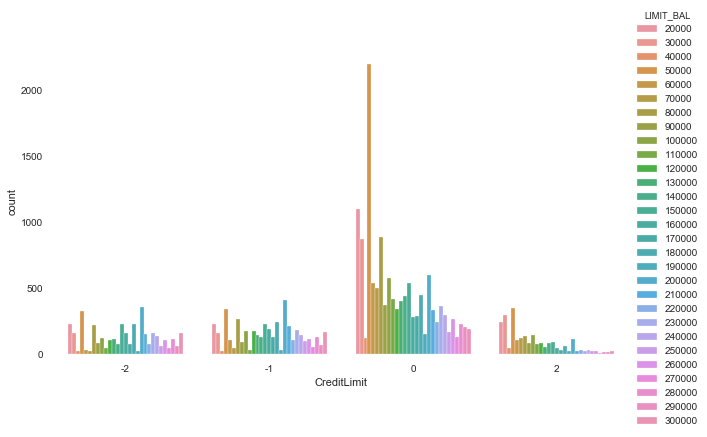

In [27]:
# Credit Limit Group by Pay5
g = sns.catplot('PAY_6', data=credit1, hue='LIMIT_BAL', kind='count', aspect=1.75)
g.set_xlabels('CreditLimit')

In [28]:
# Number of customer default class grouped by Education.
credit.pivot_table('LIMIT_BAL', 'MARRIAGE', 'SEX', aggfunc=np.sum, margins=True)

SEX           female        male         All
MARRIAGE                                    
0            5360000     1820000     7180000
1         1497086000   991596000  2488682000
2         1558650000   938337680  2496987680
3           19510000    12170000    31680000
All       3080606000  1943923680  5024529680

In [29]:
table = pd.crosstab(index=[credit.target,credit.MARRIAGE], columns=[credit.target,credit.SEX])

In [30]:
table.unstack()

target      default                                      not default        \
SEX          female                 male                      female         
MARRIAGE          0     1     2   3    0     1     2   3           0     1   
target                                                                       
default           3  1860  1856  44    2  1346  1485  40           0     0   
not default       0     0     0   0    0     0     0   0          37  6609   

target                                       
SEX                    male                  
MARRIAGE        2    3    0     1     2   3  
target                                       
default         0    0    0     0     0   0  
not default  7555  148   12  3844  5068  91

In [31]:
table.columns, table.index

(MultiIndex([(    'default', 'female'),
             (    'default',   'male'),
             ('not default', 'female'),
             ('not default',   'male')],
            names=['target', 'SEX']), MultiIndex([(    'default', 0),
             (    'default', 1),
             (    'default', 2),
             (    'default', 3),
             ('not default', 0),
             ('not default', 1),
             ('not default', 2),
             ('not default', 3)],
            names=['target', 'MARRIAGE']))

In [32]:
credit1.AGE.describe()

count    24001.000000
mean        34.785384
std          8.858775
min         21.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         60.000000
Name: AGE, dtype: float64

In [33]:
# Drop missing values for the records in which age is missing
age = credit1['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Passengers' Ages")

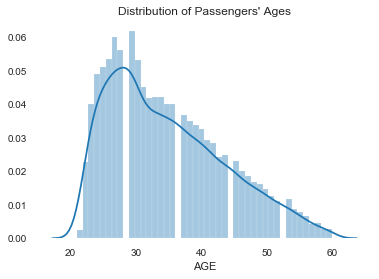

In [34]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

In [35]:
credit1.LIMIT_BAL.describe()

count     24001.000000
mean     128484.646473
std       81682.410028
min       20000.000000
25%       50000.000000
50%      120000.000000
75%      200000.000000
max      300000.000000
Name: LIMIT_BAL, dtype: float64

In [36]:
# Drop missing values for the records
limit = credit1['LIMIT_BAL'].dropna()

Text(0.5, 1.0, "Distribution of Credit Limit' Customers")

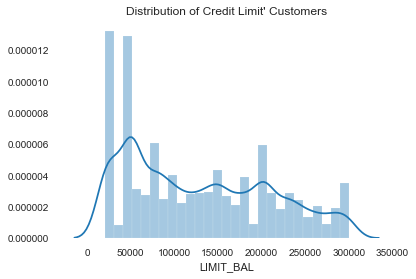

In [37]:
# Distribution of Credit Limit, with an overlay of a density plot
limit_dist = sns.distplot(limit)
limit_dist.set_title("Distribution of Credit Limit' Customers")

In [38]:
credit1.LIMIT_BAL.describe()

count     24001.000000
mean     128484.646473
std       81682.410028
min       20000.000000
25%       50000.000000
50%      120000.000000
75%      200000.000000
max      300000.000000
Name: LIMIT_BAL, dtype: float64

In [43]:
x = credit1['PAY_6']
y = credit1['BILL_AMT6']

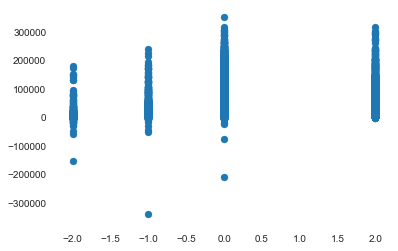

In [44]:
plt.scatter(x,y)
plt.show()

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [98]:
X_train = credit1.loc[:, credit1.columns != 'LIMIT_BAL']
y_train = credit1.iloc[:, 1]

In [99]:
print(y_train)

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 24001, dtype: int64


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5)

In [101]:
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the mu

ValueError: Data is not binary and pos_label is not specified